In [1]:
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Task 1: Linear and Binary Search

## User Input Function
    - Implement functions to prompt users to enter a list of numbers and the item they want to search for. Ensure robust input handling to manage non-numeric inputs and other potential input errors.

In [2]:
def getUserInputs():
    """A function which will handle getting the inputs from the user: a list of integers. 
    
    Returns:
    - userList, userInt
    
    Entering an empty string will exit the function.
    """
    while True:
        userIntergerInput = input('Enter the integer you would like to search for: ')
        if userIntergerInput == "":
            return None
        try: 
            userInt = int(userIntergerInput)
            break
        except ValueError as er:
            print(f'Error: Could not convert the target into an integer, please try again. Error: {er}')
    
    while True:
        input_string = input(f"Enter elements separated by commas. Your target is {userInt}")

        # exit user input function
        if input_string.strip() == "":
            print("No input received. Exiting function.")
            return None  
        
        # handle string to list conversion. checks that each element is an int
        input_list = input_string.split(',')
        try:
            userList = [int(element.strip()) for element in input_list]
            return userList, userInt
        except ValueError as e:
            print(f"Error: Could not convert a value into an integer, please try again. Error: {e}")

## Linear Search

In [3]:
def linearSearchIterative(sourceList, target):
    """Finds the target within the `sourceList` using the linear search method iteratively.
    Args:
        sourceList (list): A list of `int` values
        target (int): The `int` value that will be searched for
    Retuns:
        If the `target` is found, the index of the `sourceList` is returned. `False` is returned if otherwise
    """
    for index, each in enumerate(sourceList):
        if each == target:
            return index
    return False

In [4]:
def linearSearchRecursive(sourceList, target, index=0):
    """Finds the target within the `sourceList` using the linear search method recursively. 
    Args:
        sourceList (list): A list of `int` values
        target (int): The `int` value that will be searched for
    Retuns:
        If the `target` is found, the index of the `sourceList` is returned. `False` is returned if otherwise
    """
    if sourceList[0] == target: # target found case
        return index 
    elif len(sourceList) == 1: # target not found case
        return False
    else: # recursion
        return linearSearchRecursive(sourceList[1:], target, index + 1)

## Binary Search

In [5]:
def binarySearchIterative(sourceList, target):
    """Uses binary search to find the target within a sorted list. Returns the position of the target, if found, and `False` otherwise. Uses an iterative approach.

    Args:
        sourceList (list): A list of `int` values
        target (int): The `int` value that will be searched for
    """
    left = 0
    right = len(sourceList) - 1

    if target == sourceList[left]:
        return left
    elif target == sourceList[right]:
        return right
    else:
        while left <= right: # ensures that there are numbers in between to still go through
            midpoint_index = (left + right) // 2
            if target == sourceList[midpoint_index]:
                return midpoint_index
            elif target < sourceList[midpoint_index]:
                right = midpoint_index - 1
            else: 
                left = midpoint_index + 1

        return False

In [6]:
def binarySearchRecursive(sourceList, target, left=0, right=None):
    """Uses binary search to find the target within a sorted list. Returns the position of the target, if found, and `False` otherwise. Uses a recursive approach.
    Args:
        sourceList (list): A sorted list of `int` values
        target (int): The `int` value that will be searched for
        left (int, optional): The starting index of the sublist to search within. Default is 0.
        right (int, optional): The ending index of the sublist to search within. Default is the last index of the list.
    """
    if right is None:
        right = len(sourceList) - 1

    if left <= right:
        midpoint_index = (left + right) // 2
        if sourceList[midpoint_index] == target:
            return midpoint_index
        elif target < sourceList[midpoint_index]:
            return binarySearchRecursive(sourceList, target, left, midpoint_index - 1)
        else:
            return binarySearchRecursive(sourceList, target, midpoint_index + 1, right)
    else:
        return False

## `main()` function definition and implementation

In [7]:
def main():
    userList, userInt = getUserInputs()
    isSorted = userList == sorted(userList)

    print(f'RESULTS REPORT:\n---\nYour inputs were the following:\nSource List: {userList}. Sorted Bool: {isSorted}\nTarget Integer: {userInt}\n---')

    linearResultRec = linearSearchRecursive(userList, userInt)
    linearResultIter = linearSearchIterative(userList, userInt)

    print(f'Linear Search Results:\n\tLinear Search Iterative: {linearResultIter}\n\tLinear Search Recursive: {linearResultRec}')

    if isSorted:
        binaryResultRec = binarySearchRecursive(userList, userInt)
        binaryResultIter = binarySearchIterative(userList, userInt)

    print(f'---\nBinary Search Results:\n\tBinary Search Iterative: {binaryResultIter}\n\tBinary Search Recursive: {binaryResultRec}')

if __name__ == '__main__':
    main()

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
def main():
    result = getUserInputs()
    if result is None:
        print("No input received, exiting the program.")
        return
    
    userList, userInt = result
    isSorted = userList == sorted(userList)

    print(f'RESULTS REPORT:\n---\nYour inputs were the following:\nSource List: {userList}. Sorted Bool: {isSorted}\nTarget Integer: {userInt}\n---')

    # Measure execution time for linear search iterative
    start_time = time.time()
    linearResultIter = linearSearchIterative(userList, userInt)
    linear_iter_time = time.time() - start_time

    # Measure execution time for linear search recursive
    start_time = time.time()
    linearResultRec = linearSearchRecursive(userList, userInt)
    linear_rec_time = time.time() - start_time

    print(f'Linear Search Results:\n\tLinear Search Iterative: {linearResultIter} (Time: {linear_iter_time}s)\n\tLinear Search Recursive: {linearResultRec} (Time: {linear_rec_time}s)')

    if isSorted:
        # Measure execution time for binary search iterative
        start_time = time.time()
        binaryResultIter = binarySearchIterative(userList, userInt)
        binary_iter_time = time.time() - start_time

        # Measure execution time for binary search recursive
        start_time = time.time()
        binaryResultRec = binarySearchRecursive(userList, userInt)
        binary_rec_time = time.time() - start_time

        print(f'Binary Search Results:\n\tBinary Search Iterative: {binaryResultIter} (Time: {binary_iter_time}s)\n\tBinary Search Recursive: {binaryResultRec} (Time: {binary_rec_time}s)')
    else:
        print("List is not sorted, skipping binary search.")

if __name__ == '__main__':
    main()


RESULTS REPORT:
---
Your inputs were the following:
Source List: [1, 2, 3, 4, 5, 67]. Sorted Bool: True
Target Integer: 4
---
Linear Search Results:
	Linear Search Iterative: 3 (Time: 5.0067901611328125e-06s)
	Linear Search Recursive: 3 (Time: 6.9141387939453125e-06s)
Binary Search Results:
	Binary Search Iterative: 3 (Time: 3.0994415283203125e-06s)
	Binary Search Recursive: 3 (Time: 3.0994415283203125e-06s)


## Performance Management

Well, clearly we can test the same outputs for all search types. However, similar to what we hae learned in 620, why don't we make a bunch of test cases and compare the results of running each search method against each case? From there, let's visualize the results. 

We will use `random` to make lots of test cases, we will use a dictonary to hold all the times, and we will plot everything using `seaborn` (This ones for you, Professor Jessica!). Without further adiue, let's go!

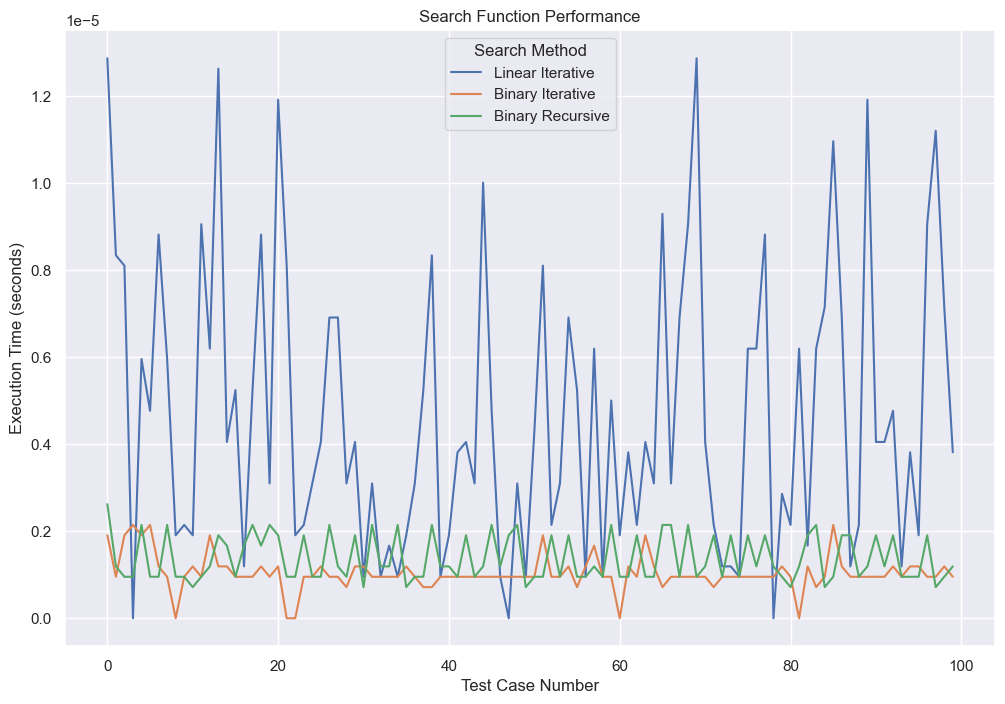

In [9]:
def generate_random_list(size, range_start, range_end):
    return sorted([random.randint(range_start, range_end) for each in range(size)])

def create_test_cases(num_cases, min_size, max_size, range_start, range_end):
    test_cases = []
    for each in range(num_cases):
        size = random.randint(min_size, max_size)
        random_list = generate_random_list(size, range_start, range_end)
        target = random.choice(random_list)
        test_cases.append((random_list, target))
    return test_cases

# Define parameters for the test cases
num_cases = 100
min_size = 100
max_size = 500
range_start = 1
range_end = 100000

# Generate the test cases
test_cases = create_test_cases(num_cases, min_size, max_size, range_start, range_end)

# Timing each function
times = {'Linear Iterative': [], 'Linear Recursive': [], 'Binary Iterative': [], 'Binary Recursive': []}

for random_list, target in test_cases:
    # Time Linear Iterative
    start = time.time()
    linearSearchIterative(random_list, target)
    times['Linear Iterative'].append(time.time() - start)
    
    # Time Linear Recursive (this is so bad that recursion depth limit will often be reached... hence, uncomment at your own discretion!!)
   # start = time.time()
   # linearSearchRecursive(random_list, target)
   # times['Linear Recursive'].append(time.time() - start)
    
    # Time Binary Iterative
    start = time.time()
    binarySearchIterative(random_list, target)
    times['Binary Iterative'].append(time.time() - start)
    
    # Time Binary Recursive
    start = time.time()
    binarySearchRecursive(random_list, target, 0, len(random_list) - 1)
    times['Binary Recursive'].append(time.time() - start)

    
# plotting
plt.figure(figsize=(12, 8))
for key, values in times.items():
    sns.lineplot(x=range(len(values)), y=values, label=key)

plt.title('Search Function Performance')
plt.xlabel('Test Case Number')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Search Method')
plt.show()

In [11]:
from Task1 import suma2

In [12]:
from memory_profiler import profile
%load_ext memory_profiler

%mprun -f suma2 suma2(0.2,0.2)


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler



Filename: /Users/josh/Desktop/Macbook Working Files/Git Repos/622-Final-Project/Task 1/Task1.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     1     70.1 MiB     70.1 MiB           1   def suma2(a,b):
     2     70.1 MiB      0.0 MiB           1       return a+b